# Charttables demo


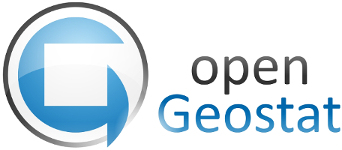

In [1]:
import pandas as pd
from pygslib import charttable as ct
import pygslib

In [2]:
# given a pandas dataframe
df = pd.DataFrame({'A': [1., 2, 3], 'B': ['a','b','c'], 'C': ['a','b','c'], 'D': ['a','b','c']})
df

A  B  C  D
0  1.0  a  a  a
1  2.0  b  b  b
2  3.0  c  c  c

## The basic

In [3]:
# Create a charttable object
tabl= ct.HTMLTable()

# add a formated columns using properties text, bar (size) and cell color 
tabl.addcolumn(name= "A", 
               text = df.A.values , 
               bar=[50,80,30], 
               colour=['red','green','blue'], # colour in word or hex
               overwrite=True)

tabl.addcolumn(name= "B", 
               text = ct.Leyend_cat(['c','z']).apply_colour(df.B.values), 
               bar=None, 
               colour = ct.Leyend_cat(['c','z']).apply_colour(df.B.values),
               overwrite=True)

tabl.addcolumn(name= "C", 
               text = df.C.values , 
               bar=None, 
               colour=['#FF0000','#800000','#FFFF00'], 
               overwrite=True)

# display the table
tabl.display()

## Using color scales

In [4]:
# first we create some data
mydata= pygslib.gslib.read_gslib_file('../datasets/cluster.dat') 

mydata.head(4)

Xlocation  Ylocation  Primary  Secondary  Declustering Weight
0       39.5       18.5     0.06       0.22                1.619
1        5.5        1.5     0.06       0.27                1.619
2       38.5        5.5     0.08       0.40                1.416
3       20.5        1.5     0.09       0.39                1.821

In [5]:
# create a color scale
mycolourscale = ct.Leyend_num(vmin=mydata['Primary'].min(), 
                              vmax=mydata['Primary'].max(), 
                              cmax = "red", 
                              cmin = "blue", 
                              undef = "grey", 
                              nval= 5,
                              log = True)
#This is  the colour scale
pd.DataFrame ({'value': mycolourscale.v, 'color': mycolourscale.c})

color     value
0    gray       NaN
1    blue      0.06
2    cyan  0.335018
3    lime   1.87061
4  yellow   10.4448
5     red     58.32

## Applaying color scales

In [6]:
# Now we get a color scale applied to the data column 'Primary'
t_color = mycolourscale.apply_colour(mydata['Primary'].values)
s_color = mycolourscale.apply_colour(mydata['Secondary'].values)

# It will look like this
pd.DataFrame ({'Primary': mydata['Primary'].values, 'Color': t_color}).tail(5)

c:\users\adrian\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


Color  Primary
135  yellow    22.75
136    lime     9.42
137    lime     8.48
138    lime     2.82
139    lime     5.26

In [7]:
# now we plot the colors

tabl2= ct.HTMLTable()

tabl2.addcolumn(name= "Index", 
               text = mydata.index.values , 
               bar= None, 
               colour=None, 
               overwrite=True)

tabl2.addcolumn(name= "Primary", 
               text = mydata['Primary'].values , 
               bar= mydata['Primary'].values, 
               colour=t_color, 
               overwrite=True)

tabl2.addcolumn(name= "Secondary", 
               text = mydata['Secondary'].values , 
               bar= mydata['Secondary'].values, 
               colour=s_color, 
               overwrite=True)

tabl2.display()